In [21]:
#!pip install rasterio
#!pip install shapely
import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
def get_file_paths(folder_path):
  """
  Adds all file paths within a specified folder to a list.

  Args:
      folder_path (str): The path to the folder.

  Returns:
      list: A list containing the full paths of all files in the folder.
             Returns an empty list if the folder does not exist or if an error occurs.
  """
  file_paths = []
  try:
    for item in os.listdir(folder_path):
      item_path = os.path.join(folder_path, item)
      if os.path.isfile(item_path):
        file_paths.append(item_path)
  except FileNotFoundError:
    print(f"Error: Folder '{folder_path}' not found.")
    return []
  except Exception as e:
      print(f"An error occurred: {e}")
      return []
  return file_paths

In [ ]:
tiff_list = get_file_paths('/Users/Jackson/mothersDay2025/data/tiff/')

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_breakline_emphasis_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


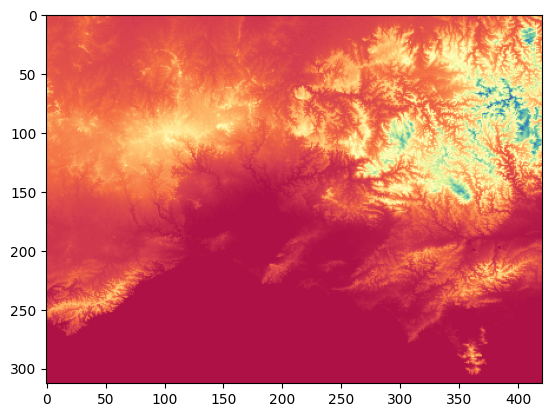

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_minimum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


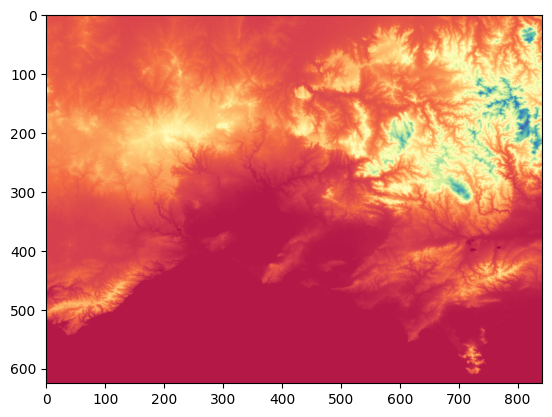

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_standarddev_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


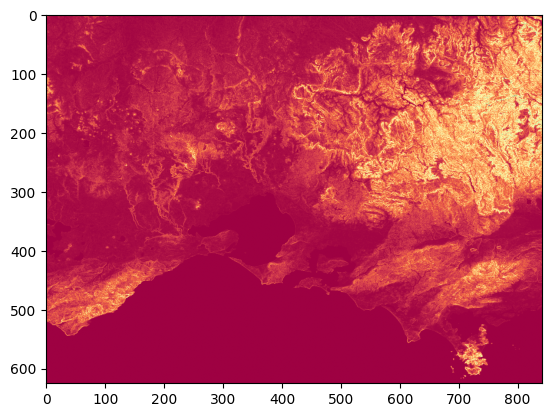

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_breakline_emphasis_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


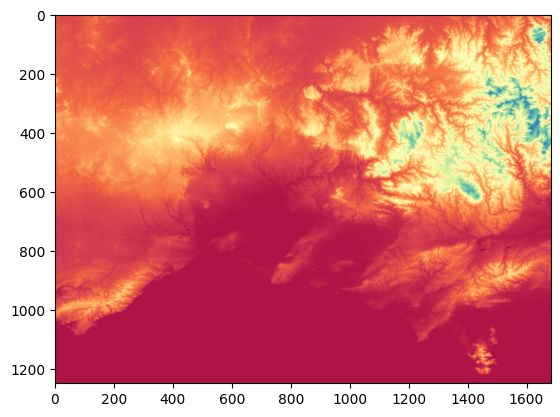

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_mean_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


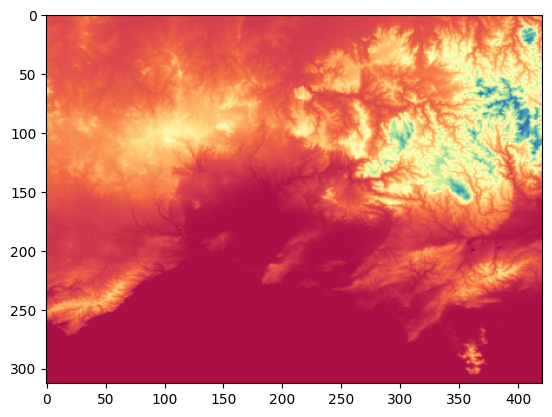

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_maximum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


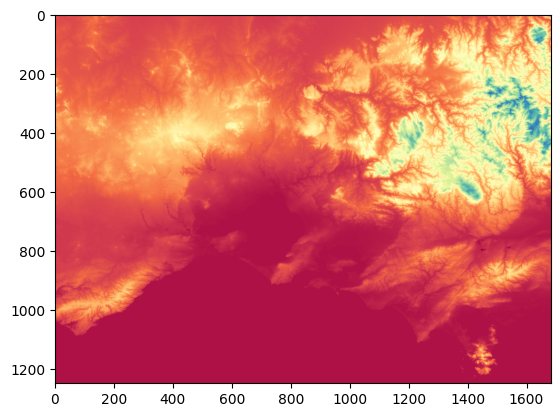

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_median_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


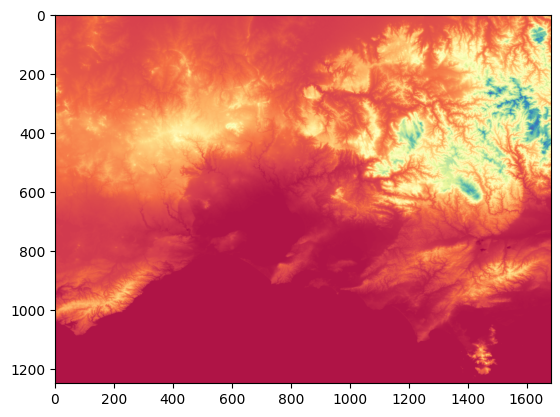

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_breakline_emphasis_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


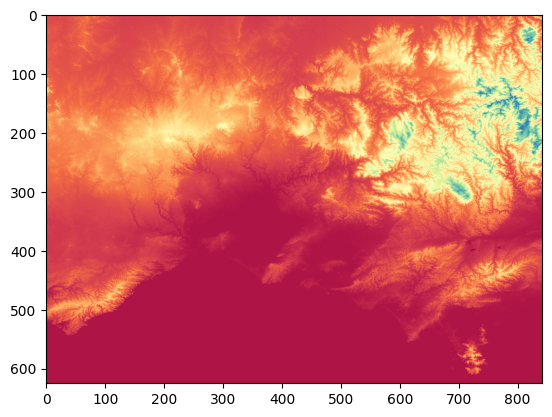

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_systematic_subsample_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


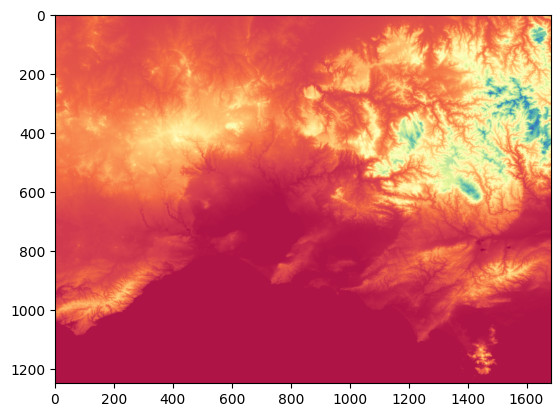

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_minimum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


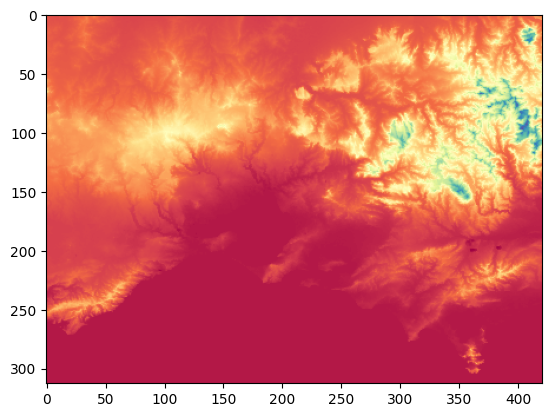

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_systematic_subsample_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


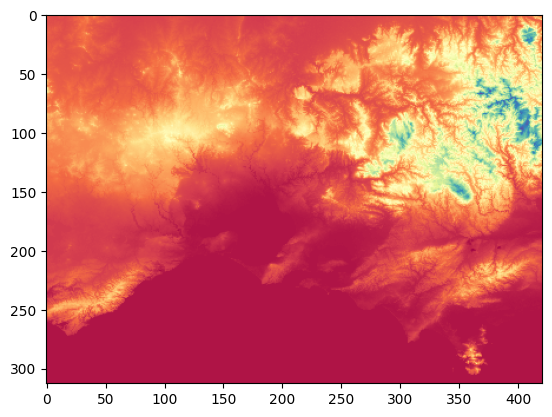

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_median_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


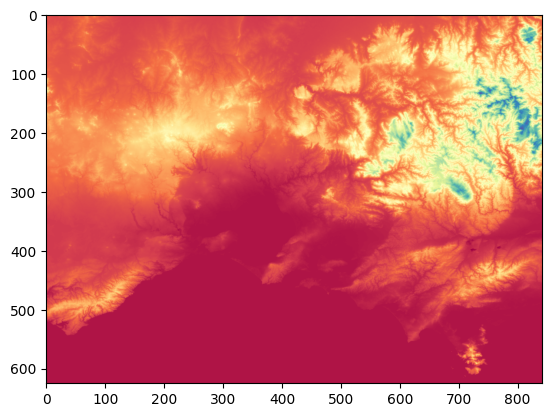

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_minimum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


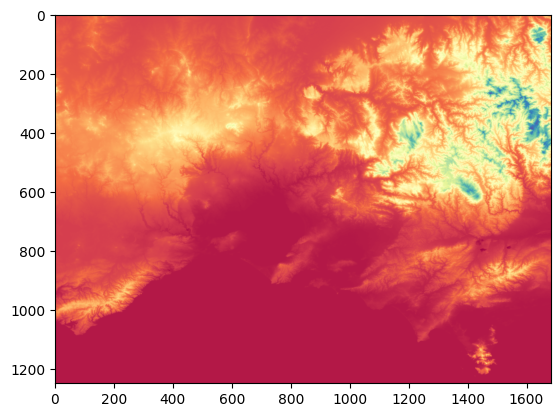

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_systematic_subsample_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


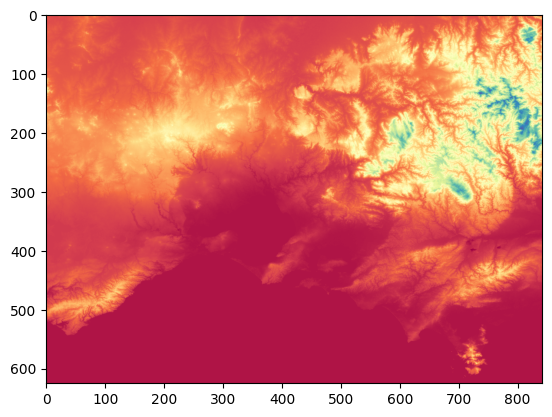

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_maximum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


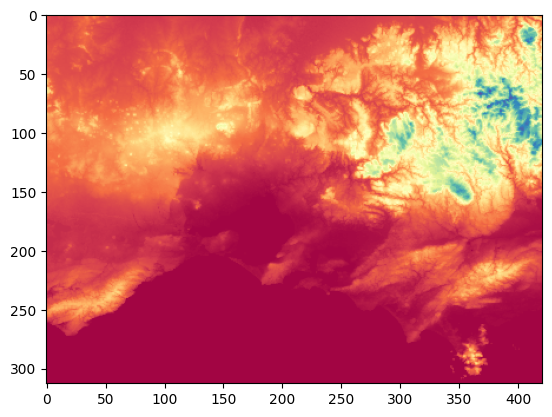

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_standarddev_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


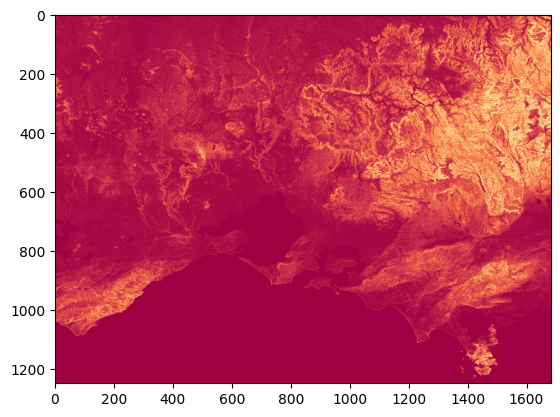

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_standarddev_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


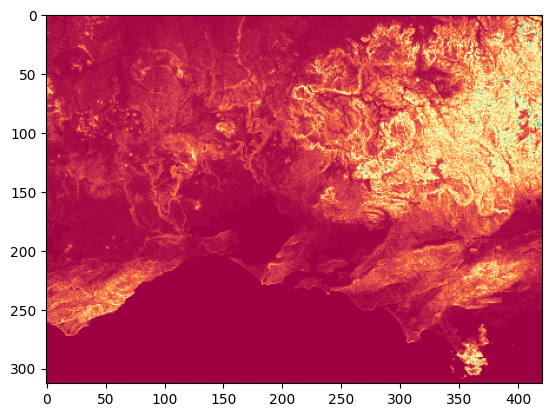

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_maximum_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


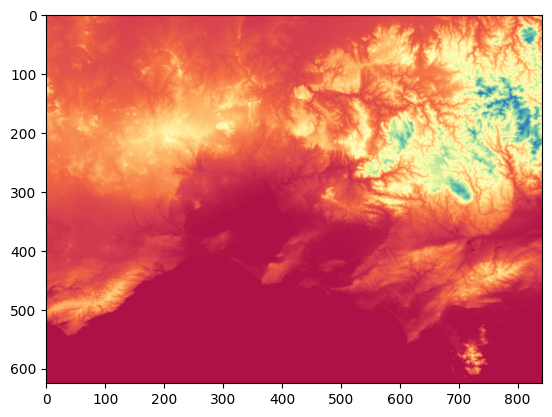

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_15arcsec_mean_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 625, 842)


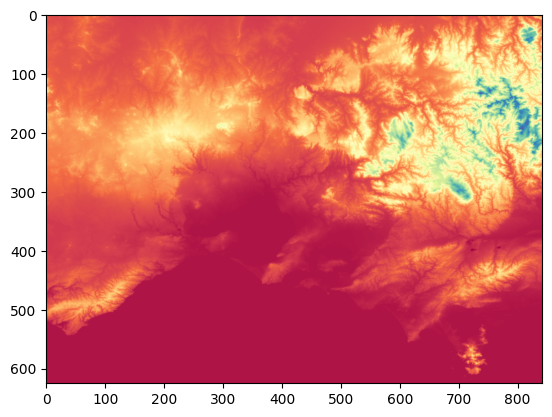

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_7pnt5arcsec_mean_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 1250, 1683)


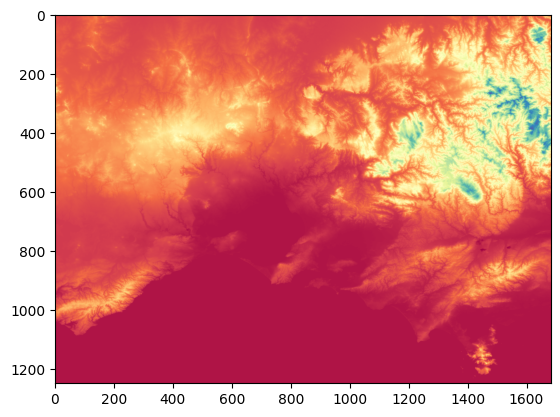

/Users/Jackson/mothersDay2025/data/usgs_gmted2010_30arcsec_median_stat_ib9kdclbgiqJKLUcy7oG.tiff
(1, 313, 421)


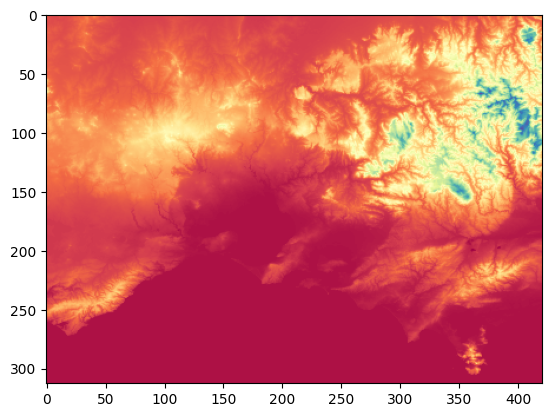

In [11]:
for i in tiff_list:
    file = rasterio.open(i)
    dataset = file.read()
    print(i)
    print(dataset.shape)
    (1, 9600, 14400)
    plt.imshow(dataset[0], cmap='Spectral')
    plt.show()

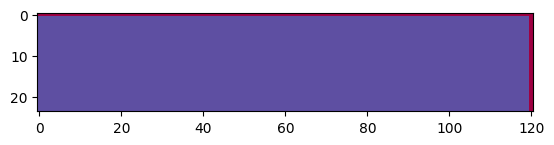

In [17]:
df = gpd.read_file('/Users/Jackson/mothersDay2025/data/shp/Spatial Metadata.shp')

#aus = df.loc[df['ADMIN'] == 'Australia']

clipped_array, clipped_transform = msk.mask(file, [mapping(df.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0], cmap='Spectral')
plt.show()

In [19]:
df.columns

Index(['ID', 'SOURCE_ORG', 'SOURCE', 'EL_SURFACE', 'NORTH', 'SOUTH', 'WEST',
       'EAST', 'X_SRCE_RES', 'Y_SRCE_RES', 'HORZ_UNIT', 'COORD_SYS',
       'HORZ_DATUM', 'VERT_DATUM', 'VERT_UNIT', 'MIN_ELEV', 'MAX_ELEV',
       'MEAN_ELEV', 'SDEV_ELEV', 'PROD_DATE', 'geometry'],
      dtype='object')

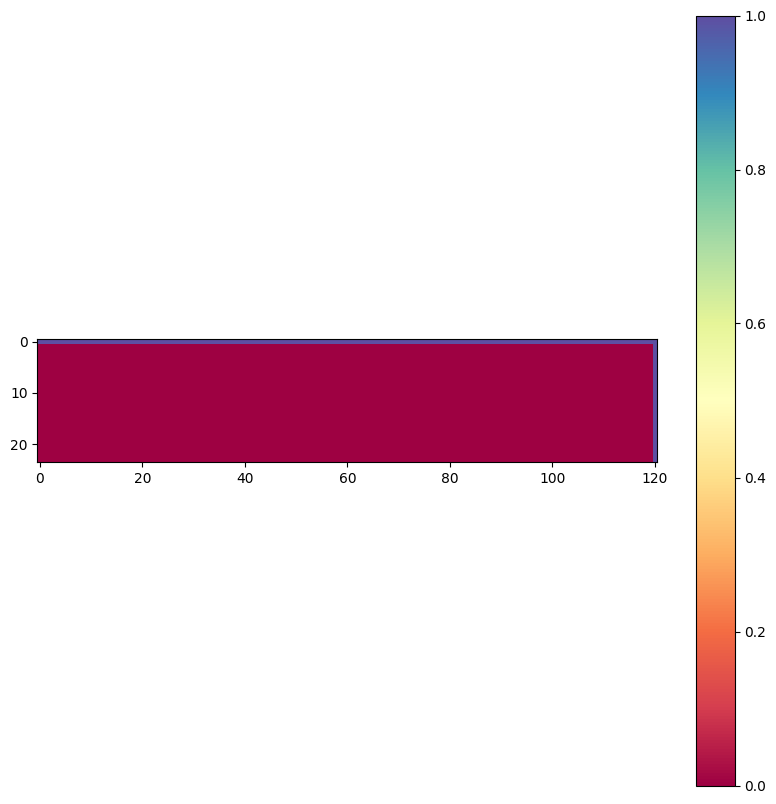

In [22]:
def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                        crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

melb_topography, value_range = clip_raster(df, file)

plt.figure(figsize=(10,10))
c = plt.imshow(melb_topography[0], cmap='Spectral')
plt.colorbar(c)
plt.show()